**PHY204 Homework 2 -- Mohamed Atouife & Haoxuan Zhang** 

In [1]:
from mpl_toolkits import mplot3d 
from mpl_toolkits.mplot3d import Axes3D 
from datetime import datetime 
import numpy as np 
import matplotlib.pyplot as plt 
import copy 

%matplotlib notebook 

**Exercise 1: Retarded Potential of A Point Charge** 

The solution of Exercise 1 is in our pdf file. 

**Exercise 2 : Accurate Radiation Characteristics of An AC Loop Current** 

**a)** Let $a$ be the radius of the current loop. Then, in the Cartesian coordinates, we can write $\mathbf{r}'$ as 

\begin{equation} 
\mathbf{r}' = a \cos{\phi} \, \mathbf{e}_x + a \sin{\phi} \, \mathbf{e}_y 
\end{equation} 

For any arbitrary point $\mathbf{r}$, we can write it in the Cartesian coordinates as 

\begin{equation} 
\mathbf{r} = x \, \mathbf{e}_x + y \, \mathbf{e}_y + z \, \mathbf{e}_z
\end{equation} 

Then, the retarded time is 

\begin{align} 
t_r = t - \frac{\| \mathbf{r} - \mathbf{r}' \|}{c} 
&= t - \frac{1}{c} \sqrt{\left( x - a \cos{\phi} \right)^2 + \left( y - a \sin{\phi} \right)^2 + z^2} 
\\ 
&= t - \frac{1}{c} \sqrt{x^2 + y^2 + z^2 + a^2 - 2a \left( x \cos{\phi} + y \sin{\phi} \right)}  
\end{align} 

Moreover, since the current is charge neutral, the electric potential should be $V \left( \mathbf{r}, t \right) = 0$, and the magnetic potential is 

\begin{align} 
\mathbf{A} \left( \mathbf{r}, t \right) = \frac{\mu_0}{4 \pi} \int \frac{I \left( t_r \right)}{\| \mathbf{r} - \mathbf{r}' \|} \, \text{d}\mathbf{l} 
\end{align} 

In the Cartesian coordinates, we can rewrite $\text{d}\mathbf{l}$ as 

\begin{equation} 
\text{d}\mathbf{l} = a \, \text{d}\phi \, \mathbf{e}_\phi = a \, \text{d}\phi \, \left( -\sin{\phi} \, \mathbf{e}_x + \cos{\phi} \, \mathbf{e}_y \right) 
\end{equation} 

Hence, the magnetic potential becomes 

\begin{equation} 
\mathbf{A} \left( \mathbf{r}, t \right) = \frac{\mu_0 a}{4 \pi} \int \frac{I \left( t_r \right)}{\| \mathbf{r} - \mathbf{r}' \|} \left( -\sin{\phi} \, \mathbf{e}_x + \cos{\phi} \, \mathbf{e}_y \right) \, \text{d}\phi 
\end{equation} 

In the electrostatic CGS units, the magnetic potential is 

\begin{equation} 
\mathbf{A} \left( \mathbf{r}, t \right) = \frac{a}{c^2} \int \frac{I \left( t_r \right)}{\| \mathbf{r} - \mathbf{r}' \|} \left( -\sin{\phi} \, \mathbf{e}_x + \cos{\phi} \, \mathbf{e}_y \right) \, \text{d}\phi 
\end{equation} 

**b)** First, we define the constants that will be used for programming. 

In [14]:
a = 1 # radius of the current loop. 
w = 100 # angular frequency of the oscillating current. 
c = 10000 # speed of light 
n = 100 # number of grid points. 
s = 0.001 # step size for the finite-difference method. 
I = 1 # the amplitude of the current. 

Next, we compute the magnetic potential $\mathbf{A} \left( \mathbf{r}, t \right)$ for a given position $\mathbf{r}$ and a given time $t$. 

In [15]:
def Magnetic_Potential(x, y, z, t): 
    """
    Input: 
    x, y, z : the three components of an arbitrary point r. 
    t       : an arbitrary time. 
    --------- 
    Output: 
    A_x, A_y : the x-component and the y-component of the magnetic potential of the current loop at position r and time t. 
    """
    d_phi = 2 * np.pi / n # size of the integration interval. 
    for i in range(1, n+1): 
        mid_phi = (2*i - 1) * (np.pi / n) # the middle point of d_phi for each interval i. 
        r       = (x**2 + y**2 + z**2 + a**2 - 2*a*(x*np.cos(mid_phi) + y*np.sin(mid_phi)))**(1/2) # the distance between the observer and the current loop. 
        t_r     = t - r / c # retarded time. 
        A_x     = 0 # x-component of the magnetic potential. 
        A_y     = 0 # y-component of the magnetic potential. 
        if (t_r >= 0): 
            A_x += (a / c**2) * (I*np.sin(w*t_r) / r) * (-np.sin(mid_phi)) * d_phi 
            A_y += (a / c**2) * (I*np.sin(w*t_r) / r) * (np.cos(mid_phi)) * d_phi 
        else: 
            pass 
    return A_x, A_y 

In [16]:
A_x, A_y = Magnetic_Potential(10, 0, 0, 5) 
print("A_x is : ", A_x) 
print("A_y is : ", A_y) 

A_x is :  -8.473545857754452e-13
A_y is :  -2.6963260115171017e-11


Then, we compute the electric field $\mathbf{E} \left( \mathbf{r}, t \right)$ for a given position $\mathbf{r}$ and a given time $t$, by using the following formula. 

\begin{equation} 
\mathbf{E} \left( \mathbf{r}, t \right) = - \vec{\nabla} V \left( \mathbf{r}, t \right) - \frac{\partial \mathbf{A}}{\partial t} \left( \mathbf{r}, t \right) = - \frac{\partial \mathbf{A}}{\partial t} \left( \mathbf{r}, t \right) 
\end{equation} 

In [17]:
def Electric_Field(x, y, z, t): 
    """ 
    Input: 
    x, y, z : the three components of an arbitrary point r. 
    t       : an arbitrary time. 
    --------- 
    Output: 
    E_x, E_y : the x-component and the y-component of the electric field of the current loop at position r and time t
    """ 
    A_x, A_y   = Magnetic_Potential(x, y, z, t) 
    A_x2, A_y2 = Magnetic_Potential(x, y, z, t+s) 
    
    E_x = - (A_x2 - A_x) / s 
    E_y = - (A_y2 - A_y) / s 
    
    return E_x, E_y 

Then, we compute the magnetic field $\mathbf{B} \left( \mathbf{r}, t \right)$ for a given position $\mathbf{r}$ and a given time $t$, by using the following formula. 

\begin{equation} 
\mathbf{B} \left( \mathbf{r}, t \right) = \vec{\nabla} \times \mathbf{A} \left( \mathbf{r}, t \right) = 
\begin{pmatrix} 
    \partial x \\ \partial y \\ \partial z 
\end{pmatrix} \times 
\begin{pmatrix} 
    A_x \\ A_y \\ 0 
\end{pmatrix} = 
\begin{pmatrix} 
    - \frac{\partial A_y}{\partial z} \\ 
    \frac{\partial A_x}{\partial z} \\ 
    \frac{\partial A_y}{\partial x} - \frac{\partial A_x}{\partial y} 
\end{pmatrix} 
\end{equation} 

In [18]:
def Magnetic_Field(x, y, z, t): 
    """ 
    Input: 
    x, y, z : the three components of an arbitrary point r. 
    t       : an arbitrary time. 
    --------- 
    Output: 
    B_x, B_y, B_z : the x-component, the y-component, and the z-component of the electric field of the current loop at position r and time t
    """ 
    A_x, A_y     = Magnetic_Potential(x, y, z, t) 
    Ax_xs, Ay_xs = Magnetic_Potential(x+s, y, z, t) 
    Ax_ys, Ay_ys = Magnetic_Potential(x, y+s, z, t) 
    Ax_zs, Ay_zs = Magnetic_Potential(x, y, z+s, t) 
    
    B_x = - (Ay_zs - A_y) / s # we compute $-\frac{\partial A_y}{\partial z}$ 
    B_y = (Ax_zs - A_x) / s # we compute $\frac{\partial A_x}{\partial z}$ 
    B_z = ((Ay_xs - A_y) / s) - ((Ax_ys - A_x) / s) # we compute $\frac{\partial A_y}{\partial x} - \frac{\partial A_x}{\partial y}$ 
    
    return B_x, B_y, B_z 

**c)** Next, we compute the electric field and the magnetic field at the point $(10a, 0, 0)$, upto time $T_{\text{max}} = 2 \frac{2 \pi}{\omega}$. 

In [19]:
T_max = 4*np.pi / w 
m     = 500 # number of steps of time 
T_int = T_max / m # the interval of time 

T   = []
E_X = [] 
E_Y = [] 
B_X = [] 
B_Y = [] 
B_Z = [] 

for i in range(1, m+1): 
    t = i * T_int 
    E_x, E_y      = Electric_Field(100*a, 0, 0, t) 
    B_x, B_y, B_z = Magnetic_Field(10*a, 0, 0, t) 
    T.append(t) 
    E_X.append(E_x) 
    E_Y.append(E_y) 
    B_X.append(B_x) 
    B_Y.append(B_y) 
    B_Z.append(B_z) 

Now, we plot the electric field as a function of time. 

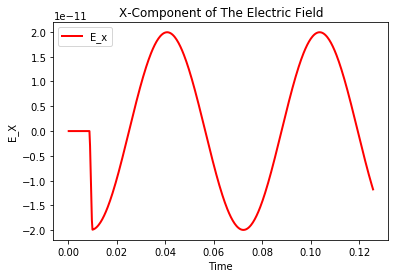

In [20]:
#---------- We plot the x-component of the electric field. 
plt.plot(T, E_X, lw=2, color='red', label='E_x') 
plt.title('X-Component of The Electric Field')
plt.xlabel('Time')
plt.ylabel('E_X') 
plt.legend() 

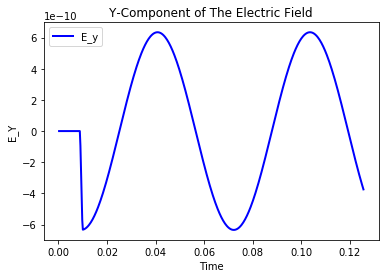

In [21]:
#---------- We plot the y-component of the electric field. 
plt.plot(T, E_Y, lw=2, color='blue', label='E_y') 
plt.title('Y-Component of The Electric Field')
plt.xlabel('Time')
plt.ylabel('E_Y') 
plt.legend() 

Now, we plot the magnetic field as a function of time. 

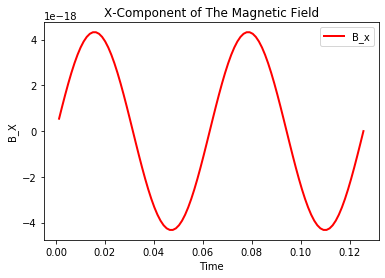

In [10]:
#---------- We plot the x-component of the magnetic field. 
plt.plot(T, B_X, lw=2, color='red', label='B_x') 
plt.title('X-Component of The Magnetic Field')
plt.xlabel('Time')
plt.ylabel('B_X') 
plt.legend() 

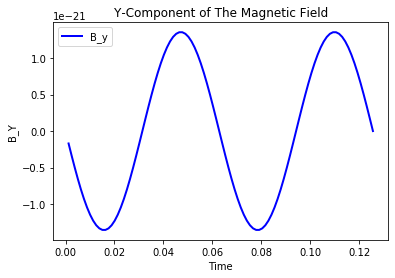

In [11]:
#---------- We plot the y-component of the magnetic field. 
plt.plot(T, B_Y, lw=2, color='blue', label='B_y') 
plt.title('Y-Component of The Magnetic Field')
plt.xlabel('Time')
plt.ylabel('B_Y') 
plt.legend() 

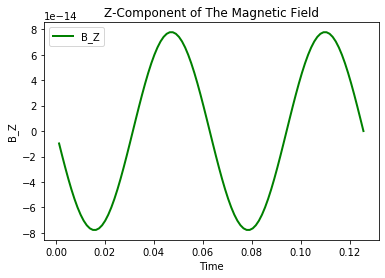

In [12]:
#---------- We plot the z-component of the magnetic field. 
plt.plot(T, B_Z, lw=2, color='green', label='B_Z') 
plt.title('Z-Component of The Magnetic Field')
plt.xlabel('Time')
plt.ylabel('B_Z') 
plt.legend() 